## Gradient Descent

In Machine Learning, we design a system that can learn from data.

The general way machine learning algorithms work is by optimizing a cost function.



Gradient descent/ascent is an algorithm for solving optimization problems. In gradient descent, I would like to find the solution which minimizes the cost function. In gradient ascent (which is the case of logistic regression), I will be maximizing the likelihood.

In statistics, a likelihood function (often simply the likelihood) is a function of the parameters of a statistical 
model given data. Likelihood functions play a key role in statistical inference, especially methods of estimating a parameter from a set of statistics. In informal contexts, "likelihood" is often used as a synonym for "probability." In statistics, a distinction is made depending on the roles of outcomes vs. parameters. Probability is used before data are available to describe possible future outcomes given a fixed value for the parameter (or parameter vector). Likelihood is used after data are available to describe a function of a parameter (or parameter vector) for a given outcome.

---
**Cost function**


The cost function is an important concept in learning, as it is a measure of how far away a particular solution is from an optimal solution to the problem to be solved. Learning algorithms search through the solution space to find a function that has the smallest possible cost.



 sigmoid function refers to the special case of the logistic function shown in the first figure and defined by the formula

 $$   S(t)={\frac {1}{1+e^{-t}}}$$

A graph of the logistic function on the t-interval 

Let us assume that ${\displaystyle t}$  is a linear function of a single explanatory variable ${\displaystyle x}$ (the case where ${\displaystyle t}$ is a linear combination of multiple explanatory variables is treated similarly). We can then express ${\displaystyle t}$ as follows:

  $$ t=\beta _{0}+\beta _{1}x$$

And the logistic function can now be written as:

  $$ F(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}} $$

Note that $${\displaystyle F(x)}$$ is interpreted as the probability of the dependent variable equaling a "success" or "case" rather than a failure or non-case. It's clear that the response variables $${\displaystyle Y_{i}} Y_{i}$$ are not identically distributed: $${\displaystyle P(Y_{i}=1\mid X)} P(Y_{i}=1\mid X)$$ differs from one data point $${\displaystyle X_{i}} X_{i}$$ to another, though they are independent given design matrix $${\displaystyle X}$$ and shared with parameters $${\displaystyle \beta }$$


Definition of the inverse of the logistic function
We can now define the inverse of the logistic function g, the logit (log odds):

 $$ g(F(x))=\ln \left({\frac {F(x)}{1-F(x)}}\right)=\beta _{0}+\beta _{1}x,
$$

and equivalently, after exponentiating both sides:

$$  {\frac {F(x)}{1-F(x)}}=e^{\beta _{0}+\beta _{1}x}.
$$


---

The particular model used by logistic regression, which distinguishes it from standard linear regression and from other types of regression analysis used for binary-valued outcomes, is the way the probability of a particular outcome is linked to the linear predictor function:

$$ \operatorname {logit} (\mathbb {E} [Y_{i}\mid x_{1,i},\ldots ,x_{m,i}])=\operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{m}x_{m,i}
$$

Written using the more compact notation described above, this is:

$$  \operatorname {logit} (\mathbb {E} [Y_{i}\mid \mathbf {X} _{i}])=\operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)={\boldsymbol {\beta }}\cdot \mathbf {X} _{i}
$$
This


An equivalent formula uses the inverse of the logit function, which is the logistic function, i.e.:

$$   {E} [Y_{i}\mid \mathbf {X} _{i}]=p_{i}=\operatorname {logit} ^{-1}({\boldsymbol {\beta }}\cdot \mathbf {X} _{i})={\frac {1}{1+e^{-{\boldsymbol {\beta }}\cdot \mathbf {X} _{i}}}}$$


$$y_i = \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i = \mathbf{x}^{\rm T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, n,$$
 
 where:
 
 $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad$$
 
 $$\mathbf{X} = \begin{pmatrix} \mathbf{x}^{\rm T}_1 \\ \mathbf{x}^{\rm T}_2 \\ \vdots \\ \mathbf{x}^{\rm T}_n \end{pmatrix}
 = \begin{pmatrix} x_{11} & \cdots & x_{1p} \\
 x_{21} & \cdots & x_{2p} \\
 \vdots & \ddots & \vdots \\
 x_{n1} & \cdots & x_{np}
 \end{pmatrix}, $$
 
 
$$\boldsymbol\beta = \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.$$

In [172]:
from __future__ import division
from IPython.display import display, Math, Latex

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%autoreload 2
%matplotlib inline
plt.style.use('ggplot')

In [18]:
X, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=2, 
                           random_state=0)

In [19]:
y[:5]

array([0, 0, 0, 1, 1])

NameError: name 'b1' is not defined

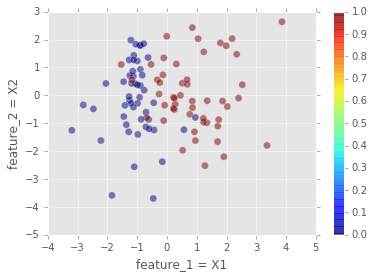

In [20]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50) # feature_1 = X[:,0], feature_2 = X[:,1]
plt.xlabel('feature_1 = X1')
plt.ylabel('feature_2 = X2')
plt.colorbar()

# eyeline = np.linspace(-2, 2)
# plt.plot(eyeline, -4*eyeline - 1.8)


plt.plot(X[:,0], -X[:,0]*b1/b2-b0/b2)
plt.ylim(-5,5)
plt.legend()
plt.show()

---
    |  x1 |  x2 |   y |
    | --- | --- | --- |
    |   0 |   1 |   1 |
    |   2 |   2 |   0 |


In [21]:
y0 = 1
y1 = 0

# Xj,i column,row

x1_0 = 0
x1_1 = 2

x2_0 = 1
x2_1 = 2

---
Hypothesis

** The "logistic" function of any number $\alpha$ is given by the inverse-logit: **

where hθ(x) is defined as follows:

the logistic function = $h_{\theta}(x) $

$\theta x^i:=\theta_0+\theta_1 x^i_1+\dots+\theta_p x^i_p$

$   h_{\theta}(x)=g(\theta^{T}x)={\frac {1}{1+e^{-{\boldsymbol {\beta }}\cdot \mathbf {X} _{i}}}}$


In [22]:
h0 = 1. / (1. + np.exp(-1*x1_0 -1*x2_0))

In [23]:
print 'h(0,1):', h0

h(0,1): 0.73105857863


In [24]:
h1 = 1. / (1. + np.exp(-1*x1_1 -1*x2_1))

In [25]:
print 'h(2,2):', h1

h(2,2): 0.982013790038


---
Cost

** Cost function for Logistic Regression**

log_likelihood:

$ L(\theta)=\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$

In [26]:
cost = y0*np.log(h0)+(1-y0)*np.log(1-h0) + y1*np.log(h1) + (1-y1)*np.log(1-h1)

In [27]:
print 'cost:', cost

cost: -4.33141161544


---
Gradient

**Gradient of the cost function**

$\frac{\partial}{\partial\theta_{j}}L(\theta) =\sum_{i=1}^{m}(y^i - h_\theta(x^{i}))x_j^i$

In [28]:
# gradient feature 1
gx1 = (y0-h0)*x1_0 + (y1-h1)*x1_1

In [29]:
print 'Gradient descend:', gx1

Gradient descend: -1.96402758008


In [30]:
# gradient feature 2
gx2 = (y0-h0)*x2_0 + (y1-h1)*x2_1

In [31]:
print 'Gradient descend:', gx2

Gradient descend: -1.69508615871


In [32]:
x_t = np.transpose(np.array([[0, 1],[2, 2]]))
x_ = np.array([[0, 1],[2, 2]])
y_ = np.array([1, 0])

B_t = np.array([[1,1]])
coeffs = np.array([1,1])

---
Functions
---
**Logistic function or the sigmoid function:**

$h_\theta(x^i)=\frac{1}{1+e^{-\theta x^i} }$

In [33]:
# with x --> NOT transposed
def h(X, coeffs):
    return 1. / (1. + np.exp(-np.dot(X, coeffs.reshape(len(coeffs), 1))))

In [34]:
hazme = h(x_, coeffs).T # row vector

In [35]:
hazme[0]

array([ 0.73105858,  0.98201379])

In [36]:
def predict(X, coeffs):
    return h(X, coeffs).round()

In [37]:
#predict(X, coeffs)

---
**Cost function:**

maximize the log likelihood + lasso ridge


$ L(\theta)=\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i})) +  \lambda\sum _{j=1}^{p} |\beta _{j}|_{}^{2} $ 

In [38]:
def log_likelihood(X, y, coeffs, lbda=0):
    lreg =  np.sum(coeffs**2)
    hx = h(X, coeffs).T
    return np.sum(y * np.log(hx[0]) + (1 - y) * np.log(1-hx[0]) + lbda*lreg)

In [39]:
log_likelihood(x_, y_, coeffs)

-4.3314116154360329

---
** Gradient function + lasso ridge(derivative)**

$\frac{\partial}{\partial\theta_{j}}L(\theta) =\sum_{i=1}^{m}(y^i - h_\theta(x^{i}))x_j^i + 2 \lambda\theta _{j}$

In [40]:
def log_likelihood_gradient(X, y, coeffs, l = 0):
    dlreg = 2*l*coeffs.T
    y = y.reshape(len(y), 1) # column vector
    dif = (y - h(X, coeffs)).T

    return np.squeeze(dif.dot(X)) + dlreg

In [41]:
log_likelihood_gradient(x_, y_, coeffs, 0)

array([-1.96402758, -1.69508616])

---

In [63]:
import eloisa_Gradient_functions as gf

In [64]:
gf.hypothesis(x_, coeffs)

array([[ 0.73105858],
       [ 0.98201379]])

In [65]:
gf.predict(x_, coeffs)

array([[ 1.],
       [ 1.]])

In [66]:
gf.log_likelihood(x_, y_, coeffs, 0)

-5.6628232308720658

In [67]:
gf.log_likelihood_gradient(x_, y_, coeffs)

array([ 0.03597242,  0.30491384])

---

In [69]:
from eloisa_Gradient_functions import log_likelihood, log_likelihood_gradient, predict

In [74]:
from eloisa_Gradient_class import GradientAscent

In [75]:
# __init__(self, cost, gradient, predict_func, fit_intercept=True, scale=False)
gd = GradientAscent(gf.log_likelihood, gf.log_likelihood_gradient, gf.predict)

In [76]:
gd.run(X, y)


Cost fn: -6931.281859
Cost fn: 21145.3032014
Cost fn: 53583.0460687
Cost fn: 91888.8947545
Cost fn: 140074.21791
Cost fn: 203135.544726
Cost fn: 288053.20045
Cost fn: 404897.38785
Cost fn: 568375.610742
Cost fn: nan


In [77]:
predictions = gd.predict(X)

In [78]:
gd.coeffs

array([ 3.77898615,  9.91881503,  2.43472164])

In [79]:
 b0, b1, b2 = gd.coeffs

---


In [80]:
X_, y__ = make_classification(n_samples=100, n_features=2,
                         n_informative=2, n_redundant=0,
                         n_classes=2, random_state=0)

In [81]:
gd_ = GradientAscent(gf.log_likelihood, gf.log_likelihood_gradient, gf.predict, fit_intercept=False)
gd_.run(X_,y__)
print "coeffs:", gd_.coeffs


Cost fn: -6931.281859
Cost fn: 19853.8614652
Cost fn: 46558.0909892
Cost fn: 74059.5426086
Cost fn: 105226.930066
Cost fn: 142820.698432
Cost fn: 190222.433986
Cost fn: 252016.561744
Cost fn: 334672.435382
Cost fn: 447477.166199
coeffs: [ 7.58509748  2.67881678]


---
Logistic regression


In [82]:
model = LogisticRegression(fit_intercept=False)
model.fit(X_,y__)
model.coef_

array([[ 2.19963064,  0.42742225]])

In [85]:
model = LogisticRegression(fit_intercept=False)
model.fit(np.insert(X_,0 , 1, axis=1), y__)
model.coef_

array([[ 0.58286607,  2.44080989,  0.45519517]])

---
Scaling

In [86]:
df = pd.read_csv('../data/grad.csv')

In [87]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [88]:
x_df = np.array(df[['gre', 'gpa', 'rank']])
y_df = np.array(df['admit'])

In [89]:
x_df[:3]

array([[ 380.  ,    3.61,    3.  ],
       [ 660.  ,    3.67,    3.  ],
       [ 800.  ,    4.  ,    1.  ]])

In [93]:
gd_ = GradientAscent(gf.log_likelihood, gf.log_likelihood_gradient, gf.predict, scale=True)
gd_.run(x_df, y_df)
print 'coeffs:', gd_.coeffs

Cost fn: -110677.167001
Cost fn: 90688.2453671
Cost fn: 91635.5171459
Cost fn: 91639.9197515
Cost fn: 91639.9461517
Cost fn: 91639.9463658
Cost fn: 91639.9463679
Cost fn: 91639.9463679
Cost fn: 91639.9463679
Cost fn: 91639.9463679
coeffs: [-0.88835275  0.27163078  0.30542451 -0.54915734]


In [95]:
likelihood_regularized = lambda X, y, coeffs: gf.log_likelihood(X, y, coeffs, 1)
gradient_regularized = lambda X, y, coeffs: gf.log_likelihood_gradient(X, y, coeffs, 1)

In [97]:
gd__ = GradientAscent(likelihood_regularized, gradient_regularized, gf.predict, scale=True)
gd__.run(x_df, y_df, step_size=0.001)
print 'coeffs:', gd__.coeffs
predictions = gd__.predict(x_df)

New cost: -45714.4761553
New cost: 11467.1915895
New cost: 45712.4815577
New cost: 65373.4724539
New cost: 76593.3133948
New cost: 83001.8411781
New cost: 86670.4552256
New cost: 88775.4249899
New cost: 89985.762311
New cost: 90683.0302798
New cost: 91085.4368858
New cost: 91318.0673779
New cost: 91452.7741096
New cost: 91530.9071679
New cost: 91576.3032393
New cost: 91602.725214
New cost: 91618.1319231
New cost: 91627.1329653
New cost: 91632.4023492
New cost: 91635.4937875
New cost: 91637.3115916
New cost: 91638.3830433
New cost: 91639.0161697
New cost: 91639.3912746
New cost: 91639.6141227
New cost: 91639.7468943
coeffs: [-0.8883524   0.27163163  0.30542356 -0.54915685]
